# Chapter 2

## 2.11 Correlation


For this developed code, we will charge the data that we downloaded from the [
Canada Weather Stats](weatherstats.ca) from the Vancouver location using the option `Climate Daily/Forecast/Sun` option setting the `row limit` to 10 000. This data was downloaded on February 7th of 2025. Take into account that due to be using data from more recent years in here, the results will not be exactly the same as in the results shown in the book but the data can be analyzed with the same procedures.

In [2]:
import pandas as pd

In [3]:
# Load the data
df = pd.read_csv("../data/weatherstats_vancouver_daily.csv")
print
# Convert the date column to datetime object
df['date'] = pd.to_datetime(df['date'])

# Display the first few rows of the dataframe
df.tail()

/tmp/ipykernel_11483/2973357021.py:2: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/weatherstats_vancouver_daily.csv")


,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
9995,1997-09-26,17.1,14.66,14.95,12.8,NaN,NaN,99,83.7,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,1997-09-25,19.6,17.24,17.10,14.6,NaN,NaN,97,84.9,81.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,1997-09-24,21.3,16.32,15.75,10.2,NaN,NaN,100,83.0,77.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,1997-09-23,20.1,15.93,15.70,11.3,NaN,NaN,100,86.7,84.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,1997-09-22,25.5,17.05,18.00,10.5,28.0,NaN,100,79.8,74.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.11.1 Pearson correlation

This implementation is relatively a simple one that will only imply us to calculate the pearson correlation and plot the data of the book using the corresponding magnitudes they compared.

In [4]:
from scipy.stats import pearsonr

First, let's create some data to replicate the scatter plots con Figure 2.4. 

In [5]:
import numpy as np

In [6]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate x values
x1 = np.linspace(0, 100, 1000)
x2 = np.linspace(0, 100, 1000)
x3 = np.linspace(0, 100, 1000)
x4 = np.linspace(0, 100, 1000)
x5 = np.linspace(0, 100, 1000)
x6 = np.linspace(0, 100, 1000)

# Generate y values with progressively increasing noise
y1 = x1 + np.random.normal(0, 5, x1.shape)
y2 = x2 + np.random.normal(0, 20, x2.shape)
y3 = x3 + np.random.normal(0, 100, x3.shape)
y4 = -x4 + np.random.normal(0, 5, x4.shape)
y5 = -x5 + np.random.normal(0, 20, x5.shape)
y6 = -x6 + np.random.normal(0, 100, x6.shape)

Also, we will implement naively the pearson correlation algorithm shown in the book to show you how you could write it on your own

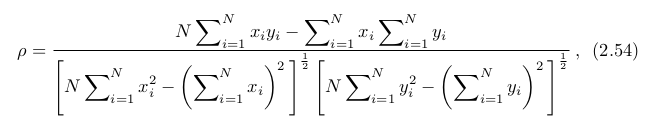

<span style="color: teal"> <b>Note:</b> I must mention libraries that implement this kind of calculations usually develop more efficient algorithms that optimize them, and that's the reason why I say this is an initial naive implementation, because it may not be the best implementation out there</span>

In [7]:
def naive_pearsonr(x: np.ndarray[np.float64], 
                   y: np.ndarray[np.float64]) -> float:
    """
    Calculate the Pearson correlation coefficient between two arrays using a naive implementation.

    Parameters:
    x (np.ndarray[np.float64]): First input array.
    y (np.ndarray[np.float64]): Second input array.

    Returns:
    float: Pearson correlation coefficient between the two arrays.
    """
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_sq = np.sum(x**2)
    sum_y_sq = np.sum(y**2)
    sum_xy = np.sum(x * y)
    
    numerator = n * sum_xy - sum_x * sum_y
    denominator = np.sqrt((n * sum_x_sq - sum_x**2) * (n * sum_y_sq - sum_y**2))
    
    return numerator / denominator

# Example usage
corr_y6 = naive_pearsonr(x6, y6)
print(f'Naive Pearson correlation coefficient for x6 and y6: {corr_y6:.2f}')

Naive Pearson correlation coefficient for x6 and y6: -0.30


Let's plot!

In [8]:
import matplotlib.pyplot as plt

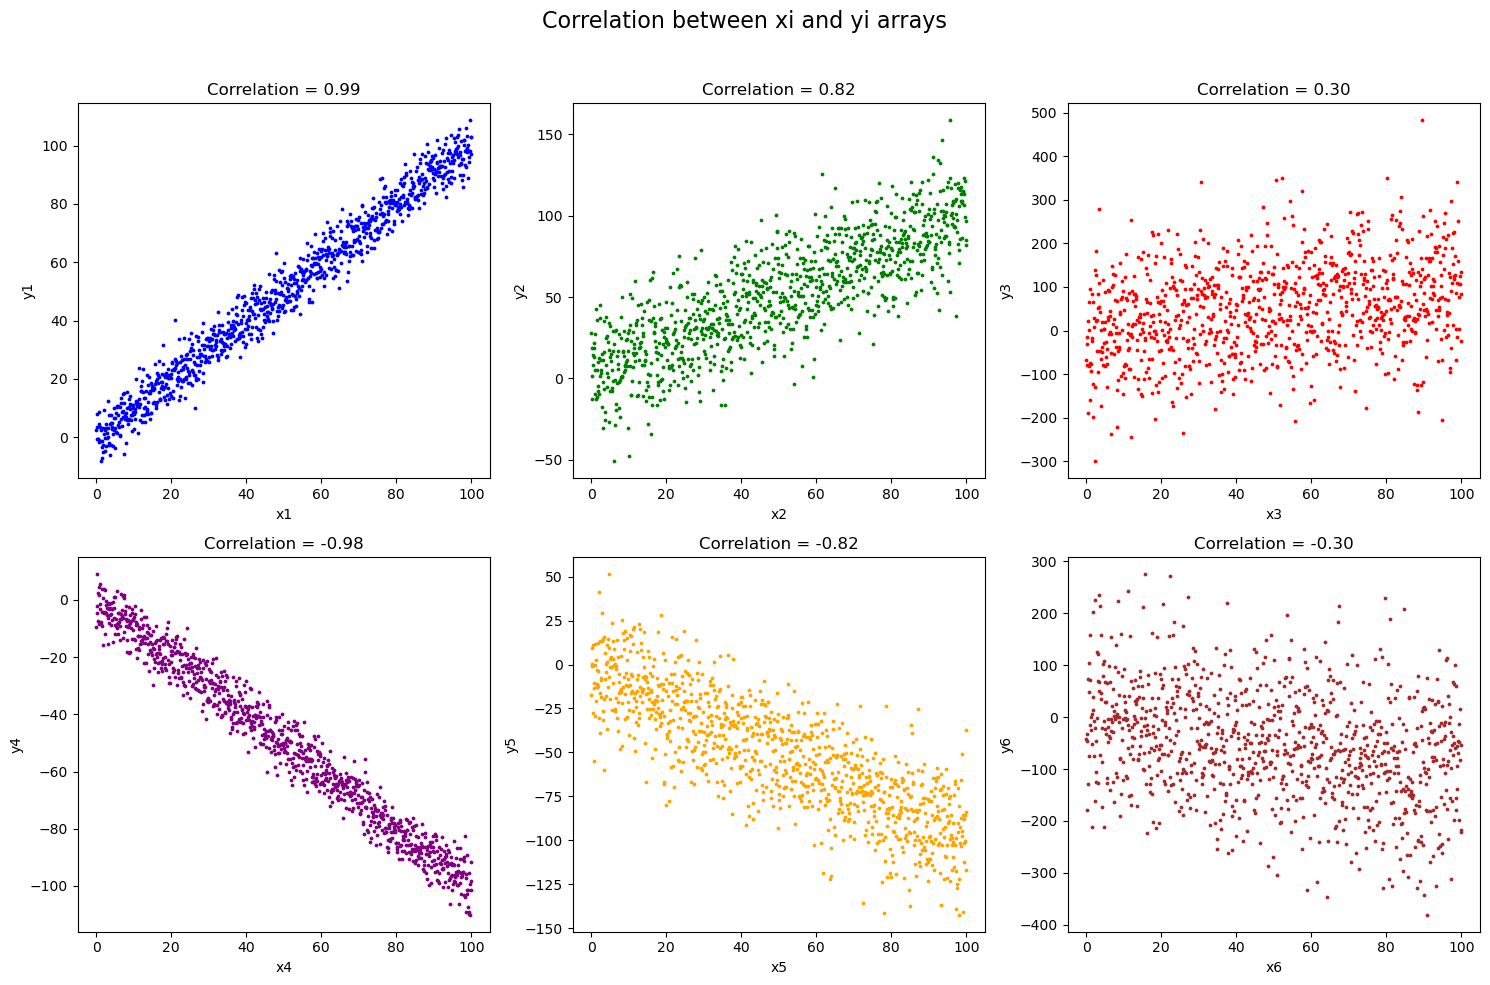

In [9]:
# Calculate correlations
corr_y1 = naive_pearsonr(x1, y1)
corr_y2 = naive_pearsonr(x2, y2)
corr_y3 = naive_pearsonr(x3, y3)
corr_y4 = naive_pearsonr(x4, y4)
corr_y5 = naive_pearsonr(x5, y5)
corr_y6 = naive_pearsonr(x6, y6)

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Correlation between xi and yi arrays', fontsize=16)

# Plot x1 vs y1
ax[0, 0].scatter(x1, y1, s=3, color='blue')
ax[0, 0].set_title(f'Correlation = {corr_y1:.2f}')
ax[0, 0].set_xlabel('x1')
ax[0, 0].set_ylabel('y1')

# Plot x2 vs y2
ax[0, 1].scatter(x2, y2, s=3, color='green')
ax[0, 1].set_title(f'Correlation = {corr_y2:.2f}')
ax[0, 1].set_xlabel('x2')
ax[0, 1].set_ylabel('y2')

# Plot x3 vs y3
ax[0, 2].scatter(x3, y3, s=3, color='red')
ax[0, 2].set_title(f'Correlation = {corr_y3:.2f}')
ax[0, 2].set_xlabel('x3')
ax[0, 2].set_ylabel('y3')

# Plot x4 vs y4
ax[1, 0].scatter(x4, y4, s=3, color='purple')
ax[1, 0].set_title(f'Correlation = {corr_y4:.2f}')
ax[1, 0].set_xlabel('x4')
ax[1, 0].set_ylabel('y4')

# Plot x5 vs y5
ax[1, 1].scatter(x5, y5, s=3, color='orange')
ax[1, 1].set_title(f'Correlation = {corr_y5:.2f}')
ax[1, 1].set_xlabel('x5')
ax[1, 1].set_ylabel('y5')

# Plot x6 vs y6
ax[1, 2].scatter(x6, y6, s=3, color='brown')
ax[1, 2].set_title(f'Correlation = {corr_y6:.2f}')
ax[1, 2].set_xlabel('x6')
ax[1, 2].set_ylabel('y6')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

We will take advantage here of an already implemented algorithm of the person correlation coefficient on the [`Scipy` library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html). 

In [10]:
from scipy.stats import pearsonr

Let's charge the corresponding magnitudes and the calculation of their pearson correlation values using `Scipy` implementation.

In [11]:
# Charging the magnitudes data from the first 2000 points
rel_humid = df["avg_relative_humidity"]
temp = df["avg_temperature"]
wind_speed = df["avg_wind_speed"]
pressure = df["avg_pressure_sea"]

In [12]:
# Correlation calculation
corr_temp_humid, _ = pearsonr(temp, rel_humid)
corr_temp_wind, _ = pearsonr(temp, wind_speed)
corr_temp_pressure, _ = pearsonr(temp, pressure)
corr_wind_pressure, _ = pearsonr(wind_speed, pressure)

Proceed with the plot!

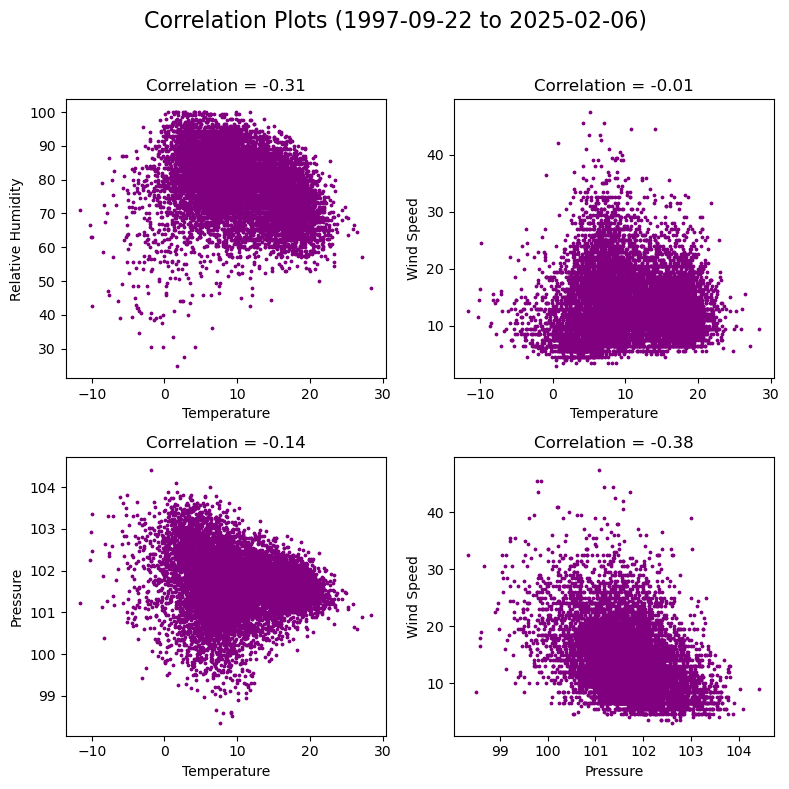

In [13]:
# Get the date range from the dataframe
date_range = f"{df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}"

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle(f'Correlation Plots ({date_range})', fontsize=16)

ax[0, 0].scatter(temp, rel_humid, s=3, color='purple')
ax[0, 0].set_title(f'Correlation = {corr_temp_humid:.2f}')
ax[0, 0].set_xlabel('Temperature')
ax[0, 0].set_ylabel('Relative Humidity')

ax[0, 1].scatter(temp, wind_speed, s=3, color='purple')
ax[0, 1].set_title(f'Correlation = {corr_temp_wind:.2f}')
ax[0, 1].set_xlabel('Temperature')
ax[0, 1].set_ylabel('Wind Speed')

ax[1, 0].scatter(temp, pressure, s=3, color='purple')
ax[1, 0].set_title(f'Correlation = {corr_temp_pressure:.2f}')
ax[1, 0].set_xlabel('Temperature')
ax[1, 0].set_ylabel('Pressure')

ax[1, 1].scatter(pressure, wind_speed, s=3, color='purple')
ax[1, 1].set_title(f'Correlation = {corr_wind_pressure:.2f}')
ax[1, 1].set_ylabel('Wind Speed')
ax[1, 1].set_xlabel('Pressure')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


As stated by the book, you must remember that the pearson correlation coefficient only analyzes linearity relation, then if the data presents other kind of non-linear relationship, the pearson correlation coefficient result could be misleading. Let's plot the corresponding example of this.

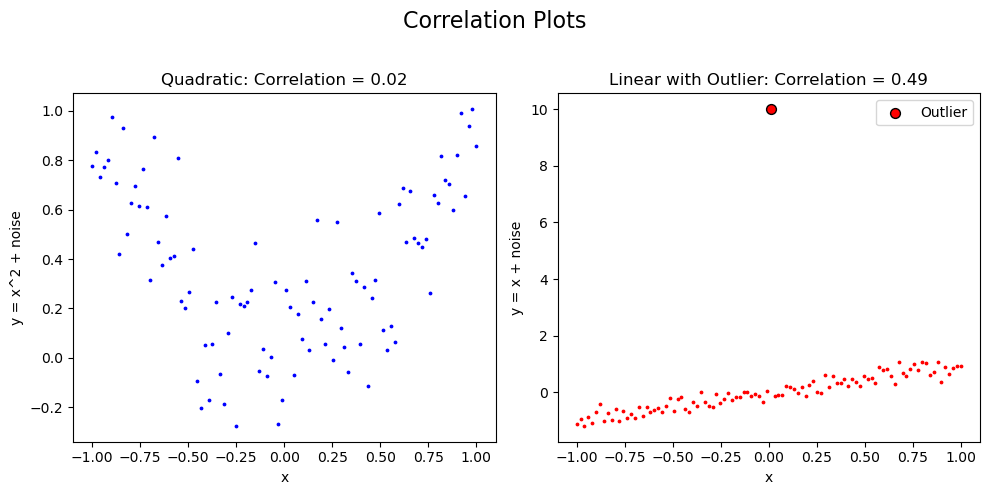

In [14]:
# Generate x values
x = np.linspace(-1, 1, 100)

# Generate y values with noise
y_quad = x**2 + np.random.normal(0, 0.2, x.shape)
y_linear = x + np.random.normal(0, 0.2, x.shape)

# Introduce an outlier in the linear data
y_linear[50] = 10

# Calculate correlations
corr_quad, _ = pearsonr(x, y_quad)
corr_linear, _ = pearsonr(x, y_linear)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Correlation Plots', fontsize=16)

# Plot quadratic data
ax[0].scatter(x, y_quad, s=3, color='blue')
ax[0].set_title(f'Quadratic: Correlation = {corr_quad:.2f}')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y = x^2 + noise')

# Plot linear data with outlier
ax[1].scatter(x, y_linear, s=3, color='red')
ax[1].scatter(x[50], y_linear[50], s=50, color='red', edgecolor='black', label='Outlier')
ax[1].set_title(f'Linear with Outlier: Correlation = {corr_linear:.2f}')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y = x + noise')
ax[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 2.11.2 Serial correlation

For the left hand subplot of figure 2.7, let's plot the autocorrelation for all the data. We will use a naive implemented function in this case.

In [15]:
def autocorrelation(data: np.ndarray, lag: int) -> float:
    """
    Calculate the autocorrelation of a given data array for a specified lag.

    Parameters:
    data (np.ndarray): Input data array.
    lag (int): The lag value for which to calculate the autocorrelation.

    Returns:
    float: The autocorrelation value for the specified lag.
    """
    n = len(data)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2)

    def r(h):
        return np.sum((data[:n - h] - mean) * (data[h:] - mean)) / c0

    return r(lag)

In [16]:
# Calculate the autocorrelation of the temperature data
temperature = df['avg_temperature'].values
n = 700
autocorrelations = []

for lag in range(1, n - 1):
    autocorr = autocorrelation(temperature, lag)
    autocorrelations.append(autocorr)

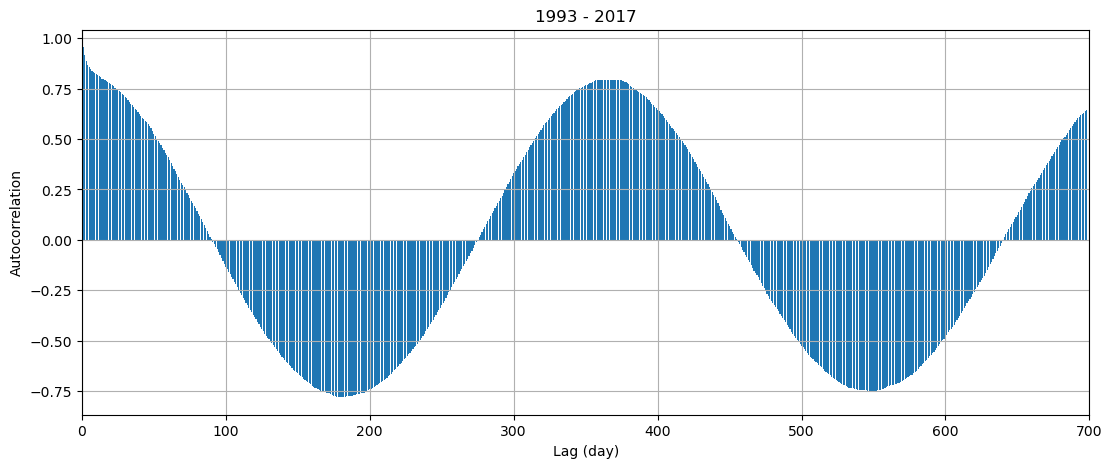

In [17]:


# Plot the autocorrelation
plt.figure(figsize=(13, 5))
plt.bar(range(1, n - 1), autocorrelations)
plt.title('1993 - 2017')
plt.xlabel('Lag (day)')
plt.ylabel('Autocorrelation')
plt.xlim((0,700))
plt.grid(True)
plt.show()

For the right hand subplot, let's use the data from December of 2016 to February of 2017 to replicate Figure 2.7.

In [18]:
# Filter the dataframe for the date range from December 2016 to February 2017
start_date = '2016-12-01'
end_date = '2017-02-28'
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Checking the border dates.
df_filtered.head(1)["date"].iloc[0], df_filtered.tail(1)["date"].iloc[0]

(Timestamp('2017-02-28 00:00:00'), Timestamp('2016-12-01 00:00:00'))

In [19]:
# Calculate the autocorrelation of the temperature data for the filtered date range
temperature_filtered = df_filtered['avg_temperature'].values
n_filtered = len(temperature_filtered)
autocorrelations_filtered = []

for lag in range(1, n_filtered - 1):
    autocorr = autocorrelation(temperature_filtered, lag)
    autocorrelations_filtered.append(autocorr)


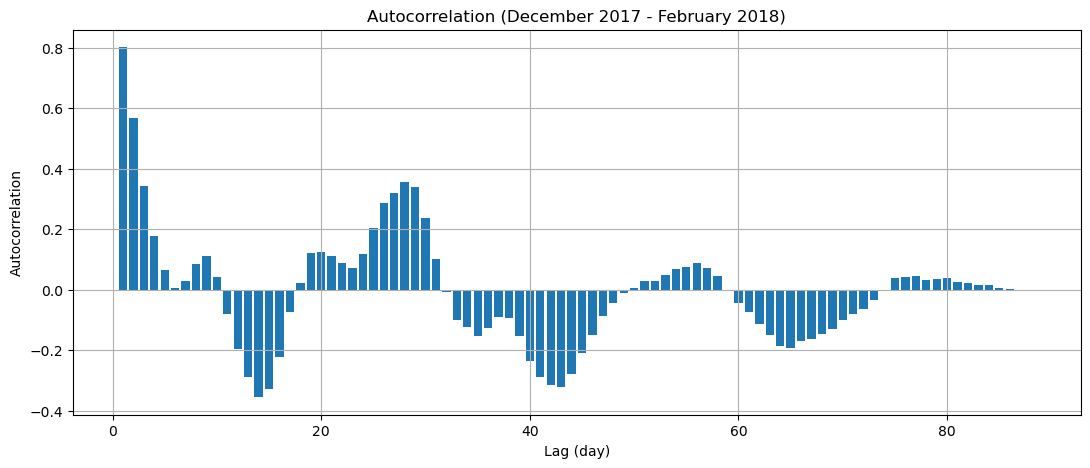

In [20]:
# Plot the autocorrelation
plt.figure(figsize=(13, 5))
plt.bar(range(1, n_filtered - 1), autocorrelations_filtered)
plt.title('Autocorrelation (December 2017 - February 2018)')
plt.xlabel('Lag (day)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

We did not include the confidence interval because the book does not explain it's calcultion on this chapter.

### 2.11.3 Spearman Rank Correlation

Let's recreate the examples given in this section. For finding the ranks you may use the function `rankdata`

In [21]:
from scipy.stats import rankdata

In [22]:
#Measurements.

x = [1,3,0,3,6]
rx = rankdata(x)

y = [2, 3, -1, 7, -99]
ry = rankdata(y)

In [23]:
print(f"The spearman correlation value is {np.round(pearsonr(rx, ry)[0], 2)}")
print(f"While the pearson correlation value is {np.round(pearsonr(x, y)[0], 2)}")

The spearman correlation value is -0.05
While the pearson correlation value is -0.79


You can also find the spearman correlation value using the function `spearmanr`

In [24]:
from scipy.stats import spearmanr

In [25]:
print(f"The spearman correlation calculated with the Scipy function is {np.round(spearmanr(x, y)[0], 2)}")

The spearman correlation calculated with the Scipy function is -0.05


So, same as the other way!

### 2.11.4 Kendall Rank Correlation (Kendall Tau)

Let's create a naive function of the Kendall Tau coefficient. Let's remember we must count the number of concordant and discordant pairs for $i < j$.

In [26]:
def naive_kendall_tau(x1: np.ndarray[float],
                      x2: np.ndarray[float]) -> float:
    
    """
    Calculate the Kendall Tau correlation coefficient between two arrays using a naive implementation.
    
    Parameters:
    x1 (np.ndarray[float]): First input array.
    x2 (np.ndarray[float]): Second input array.
    
    Returns:
    float: Kendall Tau correlation coefficient between the two arrays.
    """
    n = len(x1)
    concordant_pairs = 0
    discordant_pairs = 0
    for i in range(n - 1):
        for j in range(i + 1, n):
            if (x1[i] - x1[j]) * (x2[i] - x2[j]) > 0:
                concordant_pairs += 1
            elif (x1[i] - x1[j]) * (x2[i] - x2[j]) < 0:
                discordant_pairs += 1

    kendall_tau = (concordant_pairs - discordant_pairs) / (0.5 * n * (n - 1))
    return kendall_tau

In [27]:
# Generate x values
x = np.linspace(-1, 1, 100)

# Generate y values with noise
y_quad = x**2 + np.random.normal(0, 0.2, x.shape)
y_linear = x + np.random.normal(0, 0.2, x.shape)

# Introduce an outlier in the linear data
y_linear[50] = 10

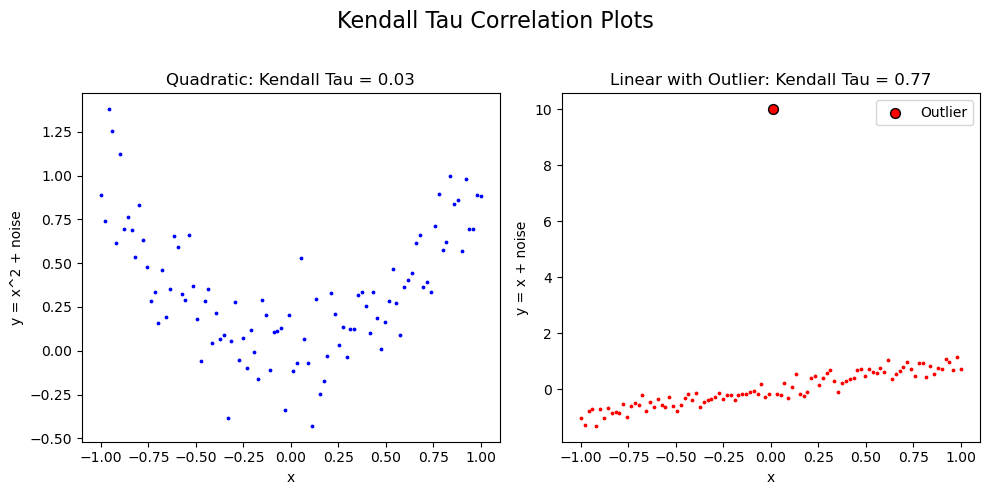

In [28]:
# Calculate Kendall Tau correlations
kendall_tau_quad = naive_kendall_tau(x, y_quad)
kendall_tau_linear = naive_kendall_tau(x, y_linear)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Kendall Tau Correlation Plots', fontsize=16)

# Plot quadratic data
ax[0].scatter(x, y_quad, s=3, color='blue')
ax[0].set_title(f'Quadratic: Kendall Tau = {kendall_tau_quad:.2f}')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y = x^2 + noise')

# Plot linear data with outlier
ax[1].scatter(x, y_linear, s=3, color='red')
ax[1].scatter(x[50], y_linear[50], s=50, color='red', edgecolor='black', label='Outlier')
ax[1].set_title(f'Linear with Outlier: Kendall Tau = {kendall_tau_linear:.2f}')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y = x + noise')
ax[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

We did it by applying a naive code. Let's now do it again with the `kendaltau` function from scipy and compare the results with the previous coefficients,

In [29]:
from scipy.stats import kendalltau

# Calculate Spearman, Pearson, and Kendall coefficients for y_linear
spearman_corr_linear, _ = spearmanr(x, y_linear)
pearson_corr_linear, _ = pearsonr(x, y_linear)
kendall_corr_linear, _ = kendalltau(x, y_linear)

print(f"Spearman correlation for outlier: {spearman_corr_linear:.2f}")
print(f"Pearson correlation for outlier: {pearson_corr_linear:.2f}")
print(f"Kendall correlation for outlier: {kendall_corr_linear:.2f}")
print("\n")

# Calculate Spearman, Pearson, and Kendall coefficients for y_quad
spearman_corr_quad, _ = spearmanr(x, y_quad)
pearson_corr_quad, _ = pearsonr(x, y_quad)
kendall_corr_quad, _ = kendalltau(x, y_quad)

print(f"Spearman correlation for quadratic relation: {spearman_corr_quad:.2f}")
print(f"Pearson correlation for quadratic relation: {pearson_corr_quad:.2f}")
print(f"Kendall correlation for quadratic relation: {kendall_corr_quad:.2f}")
print("\n")


Spearman correlation for outlier: 0.93
Pearson correlation for outlier: 0.49
Kendall correlation for outlier: 0.77


Spearman correlation for quadratic relation: 0.04
Pearson correlation for quadratic relation: -0.00
Kendall correlation for quadratic relation: 0.03




### 2.11.5 Biweight Midcorrelation

Let's obtain the rescaled versions of x and y

In [31]:
from scipy.stats import median_abs_deviation

In [32]:
def naive_biweight_corr(x: np.ndarray[float],
                      y: np.ndarray[float]) -> float:
    """
    Calculate the Biweight Midcorrelation between two arrays using a naive implementation.

    Parameters:
    x (np.ndarray[float]): First input array.
    y (np.ndarray[float]): Second input array.

    Returns:
    float: Biweight Midcorrelation coefficient between the two arrays.
    """
    
    # Scaling the arrays
    Mx = np.median(x)
    My = np.median(y)
    MADx = median_abs_deviation(x)
    MADy = median_abs_deviation(y)

    p = (x - Mx)/(9*MADx)
    q = (y - My)/(9*MADy)
    
    # Calculate the weights
    wx = np.where(np.abs(p) < 1, (1 - p**2)**2, 0)
    wy = np.where(np.abs(q) < 1, (1 - q**2)**2, 0)
    
    # Calculate the correlation
    num = np.sum(wx * wy * (x - Mx) * (y - My))
    den = np.sqrt(np.sum(wx * (x - Mx)**2) * np.sum(wy * (y - My)**2))
    
    return num / den

Now let's compare the results of this new correlation function with the previous ones

In [34]:
# Calculate Biweight Midcorrelation coefficients
biweight_corr_linear = naive_biweight_corr(x, y_linear)
biweight_corr_quad = naive_biweight_corr(x, y_quad)

# Print the results for y_linear
print(f"Pearson correlation for outlier: {pearson_corr_linear:.2f}")
print(f"Spearman correlation for outlier: {spearman_corr_linear:.2f}")
print(f"Kendall correlation for outlier: {kendall_corr_linear:.2f}")
print(f"Biweight Midcorrelation for outlier: {biweight_corr_linear:.2f}")
print("\n")

# Print the results for y_quad
print(f"Pearson correlation for quadratic relation: {pearson_corr_quad:.2f}")
print(f"Spearman correlation for quadratic relation: {spearman_corr_quad:.2f}")
print(f"Kendall correlation for quadratic relation: {kendall_corr_quad:.2f}")
print(f"Biweight Midcorrelation for quadratic relation: {biweight_corr_quad:.2f}")
print("\n")

Pearson correlation for outlier: 0.49
Spearman correlation for outlier: 0.93
Kendall correlation for outlier: 0.77
Biweight Midcorrelation for outlier: 0.86


Pearson correlation for quadratic relation: -0.00
Spearman correlation for quadratic relation: 0.04
Kendall correlation for quadratic relation: 0.03
Biweight Midcorrelation for quadratic relation: 0.03


